# Import libraries

In [1]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

# Import modules

In [2]:
# Add path for module
# FIXME: shouldn't need this with a package install (`__init__` should suffice)
SCRIPT_DIR = Path().resolve().parent
sys.path.append(str(SCRIPT_DIR))

from KuehnEtAl2023 import run_displacement_profile

# Run profile

In [3]:
magnitude, style, percentile, step_size = 6.8, "strike-slip", 0.5, 0.01

df = run_displacement_profile.run_profile(magnitude, style, percentile, step_size)

df

,magnitude,location,style,percentile,model_number,lambda,mu_site,sigma_site,mu_complement,sigma_complement,Y_site,Y_complement,Y_folded,displ_site,displ_complement,displ_folded
0,6.8,0.00,strike-slip,0.5,-1,0.161181,-1.734550,0.971766,-1.734550,1.063136,-1.734550,-1.734550,-1.734550,0.130751,0.130751,0.130751
1,6.8,0.01,strike-slip,0.5,-1,0.161181,-1.568438,0.964116,-1.661790,1.053275,-1.568438,-1.661790,-1.615114,0.163971,0.144529,0.153993
2,6.8,0.02,strike-slip,0.5,-1,0.161181,-1.452016,0.956672,-1.594129,1.043633,-1.452016,-1.594129,-1.523073,0.191249,0.158414,0.174184
3,6.8,0.03,strike-slip,0.5,-1,0.161181,-1.350663,0.949434,-1.528962,1.034210,-1.350663,-1.528962,-1.439813,0.218003,0.172829,0.194317
4,6.8,0.04,strike-slip,0.5,-1,0.161181,-1.258803,0.942398,-1.465753,1.025006,-1.258803,-1.465753,-1.362278,0.244896,0.187845,0.214786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,6.8,0.96,strike-slip,0.5,-1,0.161181,-1.465753,1.025006,-1.258803,0.942398,-1.465753,-1.258803,-1.362278,0.187845,0.244896,0.214786
97,6.8,0.97,strike-slip,0.5,-1,0.161181,-1.528962,1.034210,-1.350663,0.949434,-1.528962,-1.350663,-1.439813,0.172829,0.218003,0.194317
98,6.8,0.98,strike-slip,0.5,-1,0.161181,-1.594129,1.043633,-1.452016,0.956672,-1.594129,-1.452016,-1.523073,0.158414,0.191249,0.174184
99,6.8,0.99,strike-slip,0.5,-1,0.161181,-1.661790,1.053275,-1.568438,0.964116,-1.661790,-1.568438,-1.615114,0.144529,0.163971,0.153993


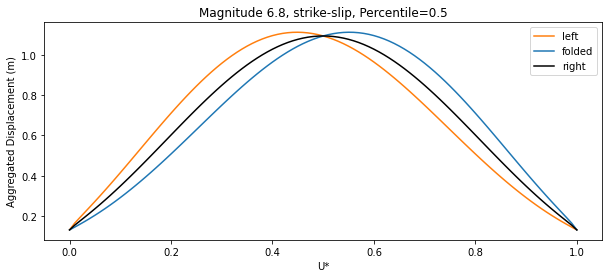

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
x, y_left, y_right, y_folded = (
    df["location"],
    df["displ_site"],
    df["displ_complement"],
    df["displ_folded"],
)
ax.plot(x, y_left, c="tab:orange", label="left")
ax.plot(x, y_right, c="tab:blue", label="folded")
ax.plot(x, y_folded, c="k", label="right")
title = f"Magnitude {magnitude}, {style}, Percentile={percentile}"
ax.set(xlabel="U*", ylabel="Aggregated Displacement (m)", title=title)
ax.legend(loc="best")